In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("HousingData.csv")

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
features = ["CRIM","RM","AGE","DIS","LSTAT"]
target = "MEDV"
X = df[features]
y = df[target]

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [13]:
X_train.shape , X_test.shape

((315, 5), (79, 5))

In [14]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [15]:
ridge_model = Ridge(alpha= 1.0)
ridge_model.fit(X_train,y_train)

Ridge()

In [16]:
Lasso_model = Lasso(alpha = 1.0)
Lasso_model.fit(X_train,y_train)

Lasso()

In [17]:
print(lr_model.coef_)
print(lr_model.intercept_)

[-0.15288336  5.56897094 -0.04788888 -0.6989461  -0.48942393]
0.0089091147360989


In [18]:
print(ridge_model.coef_)
print(ridge_model.intercept_)

[-0.15248494  5.50735731 -0.04758919 -0.69801713 -0.49379883]
0.4261819037007193


In [19]:
print(Lasso_model.coef_)
print(Lasso_model.intercept_)

[-0.11058921  2.26280774 -0.00495834 -0.08209542 -0.70031678]
18.010890335406202


In [20]:
y_pred_lr = lr_model.predict(X_test)
y_pred_ridge = lr_model.predict(X_test)
y_pred_lasso = lr_model.predict(X_test)

In [21]:
def evaluate_model(y_true,y_pred):
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    r2 = r2_score(y_true,y_pred)
    return rmse,r2

In [22]:
rmse_lr,r2_lr = evaluate_model(y_test,y_pred_lr)
rmse_ridge,r2_ridge = evaluate_model(y_test,y_pred_ridge)
rmse_lasso,r2_lasso = evaluate_model(y_test,y_pred_lasso)

In [23]:
results = pd.DataFrame({
    'Model': ['Multiple Regression', 'Ridge Regression', 'Lasso Regression'],
    'RMSE': [rmse_lr, rmse_ridge, rmse_lasso],
    'R² Score': [r2_lr, r2_ridge, r2_lasso]
})
print("\nModel Performance:")
print(results)


Model Performance:
                 Model      RMSE  R² Score
0  Multiple Regression  6.193205  0.545259
1     Ridge Regression  6.193205  0.545259
2     Lasso Regression  6.193205  0.545259


In [24]:
alphas = [0.1, 5, 10]
ridge_results = []
lasso_results = []
for alpha in alphas :
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    rmse,r2 = evaluate_model(y_test,ridge.predict(X_test))
    ridge_results.append((alpha,rmse,r2))
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train,y_train)
    rmse,r2 = evaluate_model(y_test,lasso.predict(X_test))
    lasso_results.append((alpha,rmse,r2))
ridge_df = pd.DataFrame(ridge_results,columns=["Alpha","Rmse","R2"])
lasso_df = pd.DataFrame(lasso_results,columns=["Alpha","Rmse","R2"])
print(ridge_df)
print(lasso_df)
    

   Alpha      Rmse        R2
0    0.1  6.193436  0.545225
1    5.0  6.205878  0.543396
2   10.0  6.220268  0.541276
   Alpha      Rmse        R2
0    0.1  6.213827  0.542225
1    5.0  7.176090  0.389467
2   10.0  7.314647  0.365663


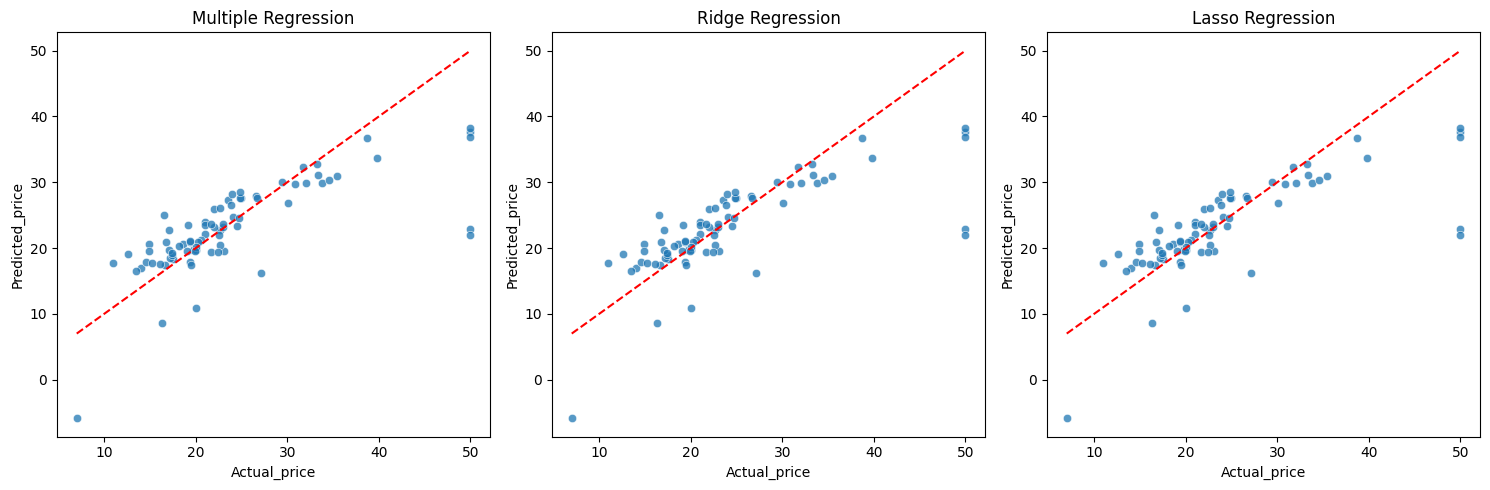

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.scatterplot(x=y_test,y=y_pred_lr,alpha = 0.75)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],"--",color = "red")
plt.xlabel("Actual_price")
plt.ylabel("Predicted_price")
plt.title("Multiple Regression")


plt.subplot(1,3,2)
sns.scatterplot(x=y_test,y=y_pred_lr,alpha = 0.75)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],"--",color = "red")
plt.xlabel("Actual_price")
plt.ylabel("Predicted_price")
plt.title("Ridge Regression")

plt.subplot(1,3,3)
sns.scatterplot(x=y_test,y=y_pred_lr,alpha = 0.75)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],"--",color = "red")
plt.xlabel("Actual_price")
plt.ylabel("Predicted_price")
plt.title("Lasso Regression")

plt.tight_layout()
plt.show()

